In [1]:
from numpy import linalg as lg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

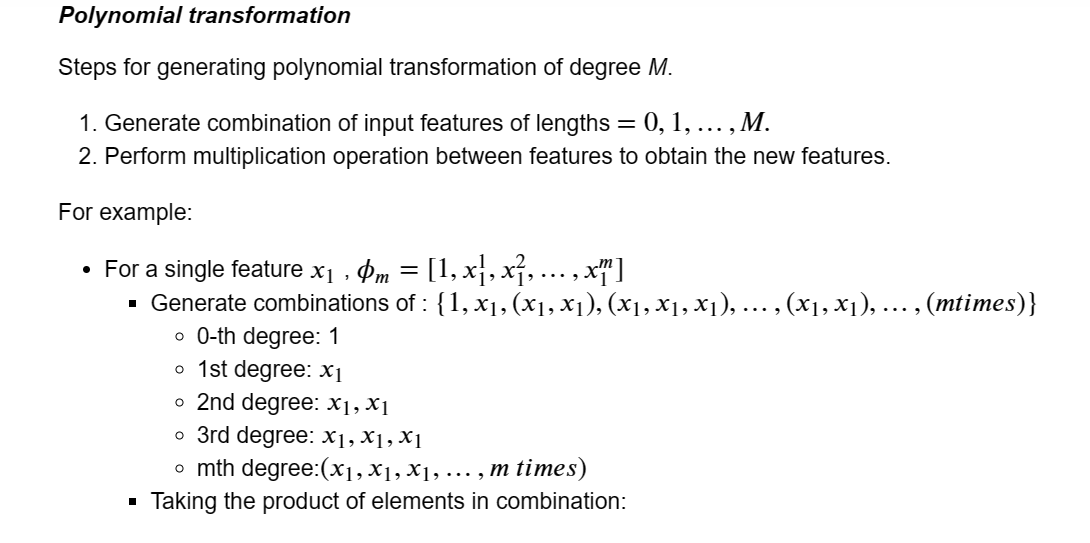

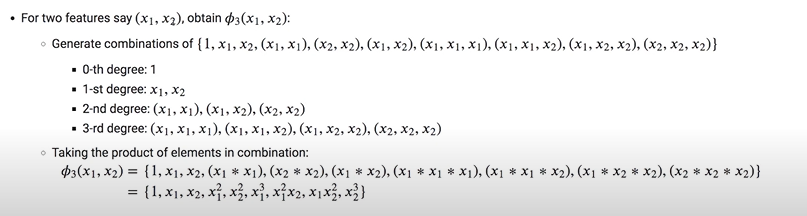

In [2]:
import itertools 
import functools 

def get_combinations(X, degree):
    return itertools.combinations_with_replacement(X,degree)

def compute_new_feature(items):
    return functools.reduce(lambda x ,y : x*y , items)

In [3]:
X = [1, 2, 3]
degree = 2

# Get combinations
combinations = list(get_combinations(X, degree))
print("Combinations:", combinations)

# Compute new feature
items = [2, 3]
new_feature = compute_new_feature(items)
print("New feature:", new_feature)


Combinations: [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
New feature: 6


In [4]:
import itertools
import functools
import numpy as np


class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
